# Importing the Telstra data and  needed packages.

In [2]:
import numpy  as pd # for Linear algebra

In [3]:
import pandas as pd #for data preprocessing

In [4]:
event_type = pd.read_csv("event_type.csv")       # importing the event_type dataset
log_feature = pd.read_csv("log_feature.csv")     # importing the log_feature dataset
resource_type = pd.read_csv("resource_type.csv")     # importing the resource_type dataset
severity_type = pd.read_csv("severity_type.csv") # importing the severity_type dataset 
train = pd.read_csv("train.csv")                 # importing the train dataset

In [5]:
event_type.head() # viewing the first five rows

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [6]:
event_type.tail() # viewing the last five rows

,id,event_type
31165,3761,event_type 11
31166,8720,event_type 11
31167,6488,event_type 11
31168,878,event_type 11
31169,4464,event_type 11


In [7]:
log_feature.tail()  # viewing the last five rows

,id,log_feature,volume
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1
58670,4464,feature 87,2


In [8]:
resource_type.head()  #viewing the first five rows

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [9]:
severity_type.tail(5)  # viewing the last five rows

,id,severity_type
18547,3761,severity_type 1
18548,8720,severity_type 1
18549,6488,severity_type 2
18550,878,severity_type 2
18551,4464,severity_type 1


In [10]:
train.head() # viewing the first five rows

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


# Checking the data type using ".dtypes"

In [11]:
event_type.dtypes #checking the data type of event_type

id             int64
event_type    object
dtype: object

In [12]:
log_feature.dtypes #checking the data type of log_features

id              int64
log_feature    object
volume          int64
dtype: object

In [13]:
severity_type.dtypes #checking the data type of severity_type

id                int64
severity_type    object
dtype: object

In [14]:
resource_type.dtypes #checking the data type of resource_type

id                int64
resource_type    object
dtype: object

In [15]:
train.dtypes #checking the data type of train

id                 int64
location          object
fault_severity     int64
dtype: object

# Merging the Telstra dataset using the function ".merge()"

In [16]:

train_1 = train.merge(severity_type, how = 'left', left_on='id', right_on='id')
train_2 = train_1.merge(resource_type, how = 'left', left_on='id', right_on='id') 
train_3 = train_2.merge(log_feature, how = 'left', left_on='id', right_on='id')
train_4 = train_3.merge(event_type, how = 'left', left_on='id', right_on='id')

The .merge() function combines datasets together using based on common attributes. However the common name "id" is shared
between all the four dataset

In [17]:
train_4 #which contains all the merge dataset

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,severity_type 1,resource_type 8,feature 55,10,event_type 11
61835,15189,location 7,0,severity_type 1,resource_type 8,feature 70,1,event_type 11
61836,17067,location 885,0,severity_type 1,resource_type 8,feature 81,1,event_type 11
61837,17067,location 885,0,severity_type 1,resource_type 8,feature 191,1,event_type 11


In [18]:
train_4.shape #this gives the dimension in rows(61839) and columns(8)

(61839, 8)

In [19]:
print("event_type dimensions:{}".format(event_type.shape))  # .format() functions helps us to concatenate elements
print("log_feature dimensions:{}".format(log_feature.shape))

event_type dimensions:(31170, 2)
log_feature dimensions:(58671, 3)


In [20]:
print("severity_type dimensions:{}".format(severity_type.shape))  #this gives the dimension in rows and column
print("resource_type dimensions:{}".format(resource_type.shape))
print("train dimensions:{}".format(train.shape))

severity_type dimensions:(18552, 2)
resource_type dimensions:(21076, 2)
train dimensions:(7381, 3)


In [23]:
train["id"].isin(event_type["id"]).value_counts()  #the .isin() helps to filter dataframes.

True    7381
Name: id, dtype: int64

In [24]:
event_type["id"].isin(train["id"]).value_counts()

False    18702
True     12468
Name: id, dtype: int64

In [23]:
train["id"].isin(resource_type["id"]).value_counts()

True    7381
Name: id, dtype: int64

In [24]:
resource_type["id"].isin(event_type["id"]).value_counts()

True    21076
Name: id, dtype: int64

In [25]:
resource_type["id"].isin(train["id"]).value_counts()

False    12616
True      8460
Name: id, dtype: int64

In [26]:
severity_type["id"].isin(train["id"]).value_counts()

False    11171
True      7381
Name: id, dtype: int64

In [27]:
log_feature["id"].isin(train["id"]).value_counts()

False    34820
True     23851
Name: id, dtype: int64

### checking for missing values in the datasets across each columns

In [28]:
train_4.isna().sum()  #this returns a result where no NaN are present in all the columns  

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [29]:
train_4.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
61834    0
61835    0
61836    0
61837    0
61838    0
Length: 61839, dtype: int64

In [30]:
train_4.isna().sum(axis=0)

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [31]:
 #dropping the duplicate records
train_4.drop_duplicates(subset= 'id', keep= 'first', inplace = True)

In [32]:
# checking the shape of the dataset
train_4.shape

(7381, 8)

In [33]:
train_4.head(250)

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
8,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
12,8218,location 931,1,severity_type 1,resource_type 8,feature 80,9,event_type 15
18,14804,location 120,0,severity_type 1,resource_type 2,feature 134,1,event_type 34
...,...,...,...,...,...,...,...,...
2039,2588,location 1,0,severity_type 1,resource_type 8,feature 82,9,event_type 15
2047,13644,location 303,0,severity_type 4,resource_type 2,feature 312,1,event_type 35
2048,13082,location 126,0,severity_type 2,resource_type 2,feature 227,6,event_type 34
2064,8150,location 520,0,severity_type 2,resource_type 2,feature 232,9,event_type 35


# Visualization of  Plots

importing the visualisation plot packages

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

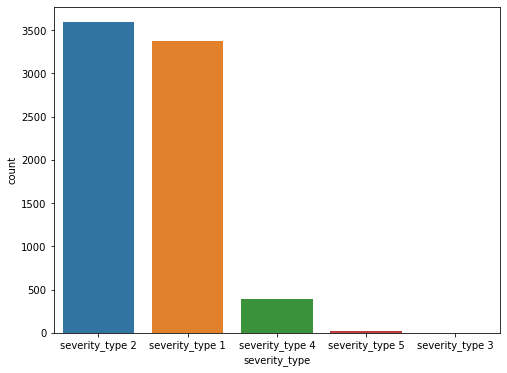

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(train_4["severity_type"])
plt.show()

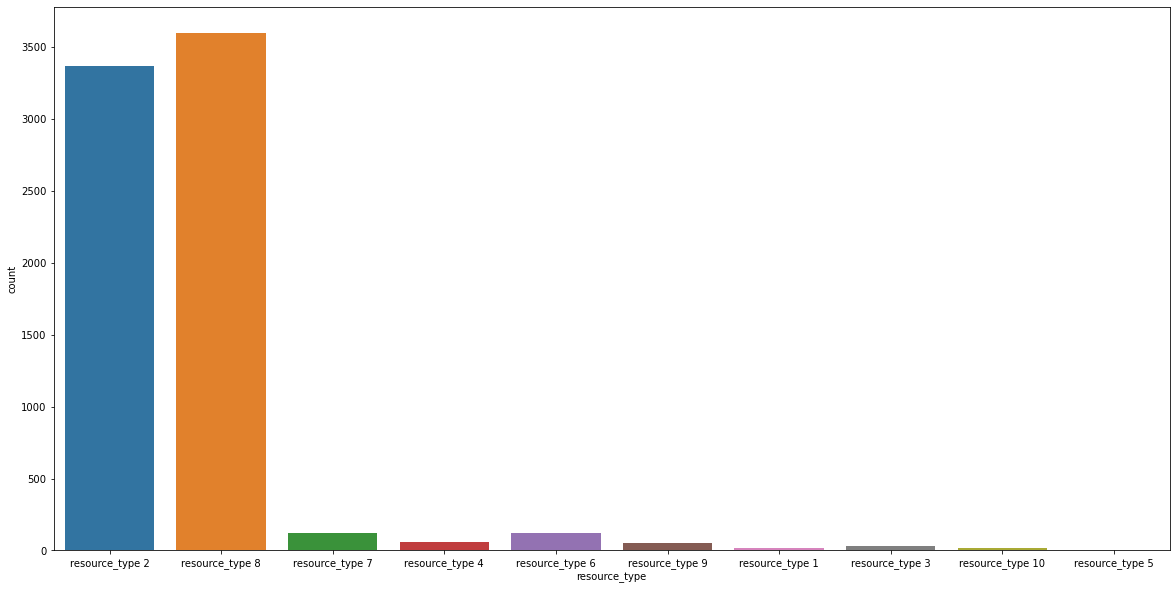

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(train_4["resource_type"])
plt.show()